<h1>Лабораторная работа №3.<span class="tocSkip"></span></h1>
<h2>Часть 1</h2>
<div class="toc"><ul class="toc-item"></ul></div>

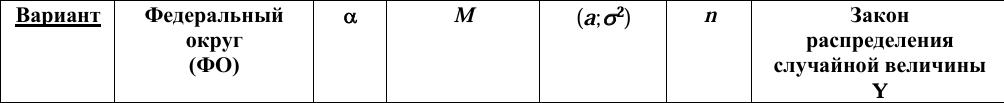

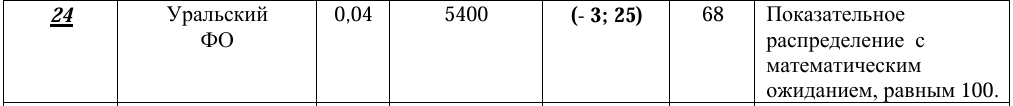

In [160]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm

In [161]:
alpha = 0.04
M = 5400
a = -3
sigma_2 = 5
n = 68

## 1. Используя данные Росстата, приведенные в файле данных CHISLO_DOCTORS.xlsx, найти значения случайного показателя X : Число врачей на 10 тысяч человек населения – в указанном в Вашем варианте Федеральном Округе в каждый год периода T:2005, 2010, 2015, 2019, 2020 и 2021 гг.

In [162]:
path = os.listdir()
path = "C:\\ida"
os.chdir(path)
os.getcwd()
doc=pd.read_excel("CHISLO_DOCTORS.xlsx", sheet_name="ROSSTAT")
doc.head()

,6.4. ЧИСЛЕННОСТЬ ВРАЧЕЙ всех специальностей1),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,(на конец года),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,"Всего, тыс. человек",NaN,NaN,NaN,NaN,NaN,"На 10 000 человек населения, человек",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2005,2010.0,2015.0,2019.0,2020.0,2021.0,2005,2010.0,2015.0,...,2020.0,2021.0,"Место,\nзанима- емое \nв Россий-ской Феде-раци...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Российская Федерация,690.3,715.8,673.0,714.6,737.4,741.9,48.6,50.1,45.9,...,50.4,51.0,NaN,NaN,34.7,35.8,38.0,42.6,46.5,46.3
4,Центральный федеральный округ,193.9,205.6,180.4,195.7,210.3,214.4,50.9,53.5,46.1,...,53.6,54.8,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
# Удаление ненужных столбцов
doc.drop(doc.columns[1:7], axis=1, inplace=True)
doc.drop(doc.columns[7:], axis=1, inplace=True)

# Удаление строк с индексами 0 и 1
doc.drop(index=[0, 1], axis=0, inplace=True)

# Переименование столбцов
doc.columns = range(doc.shape[1])

# Вывод первых строк для проверки
doc.head()

,0,1,2,3,4,5,6
2,NaN,2005,2010.0,2015.0,2019.0,2020.0,2021.0
3,Российская Федерация,48.6,50.1,45.9,48.7,50.4,51.0
4,Центральный федеральный округ,50.9,53.5,46.1,49.6,53.6,54.8
5,Белгородская область,39.6,40.4,41.3,40.5,40.4,41.9
6,Брянская область,36.4,36.2,38.0,40.2,40.5,39.1


In [164]:
doc = doc.loc[70:77]
doc.drop(index=[73], axis=0, inplace=True)
doc.columns = ["NaN", "2005", "2010", "2015", "2019", "2020", "2021"]
nt_doc = doc
doc = doc.transpose()
doc.drop(index=("NaN"), axis=1, inplace=True)


doc.columns = ["Курганская область",
               "Свердловская область",
               "Тюменская область",
               "Ханты-Мансийский автономный округ – Югра",
               "Ямало-Ненецкий автономный округ",
               "Тюменская область без автономных округов",
               "Челябинская область",
               ]
nt_doc

,NaN,2005,2010,2015,2019,2020,2021
70,Курганская область,27.7,29.7,28.8,29.3,28.9,28.6
71,Свердловская область,42.4,45.7,42.4,43.7,45.4,44.7
72,Тюменская область,49,53.9,50.9,55.9,57.1,58.5
74,Ханты-Мансийский автономный округ – Югра,49.2,55.2,53.4,57.3,57.5,58.7
75,Ямало-Ненецкий автономный округ,53,51.2,50.3,56.7,61.0,62.1
76,Тюменская область \nбез автономных округов,47.1,53.5,48.4,54.2,55.4,57.1
77,Челябинская область,40.5,43.0,39.4,42.3,42.4,42.6


## 2. Визуализировать данные показателя X в каждый год периода T по указанному в Вашем варианте Федеральному Округу с помощью графиков и боксплотов.

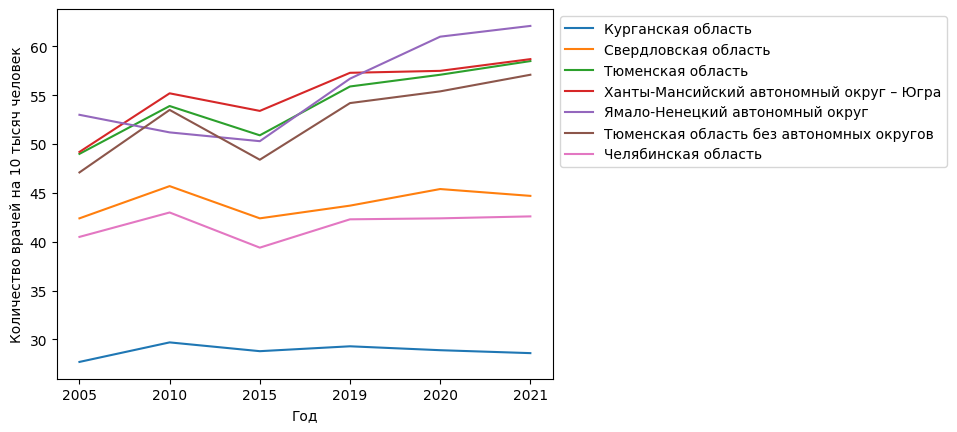

In [93]:
plt.plot(doc["Курганская область"], label='Курганская область')
plt.plot(doc["Свердловская область"], label='Свердловская область')
plt.plot(doc["Тюменская область"], label='Тюменская область')
plt.plot(doc["Ханты-Мансийский автономный округ – Югра"], label='Ханты-Мансийский автономный округ – Югра')
plt.plot(doc["Ямало-Ненецкий автономный округ"], label='Ямало-Ненецкий автономный округ')
plt.plot(doc["Тюменская область без автономных округов"], label='Тюменская область без автономных округов')
plt.plot(doc["Челябинская область"], label='Челябинская область')
plt.xlabel('Год')
plt.ylabel('Количество врачей на 10 тысяч человек')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

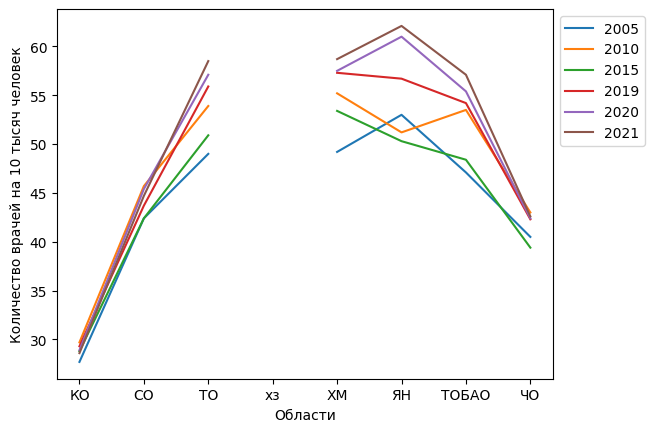

In [ ]:
plt.plot(nt_doc["2005"], label='2005')
plt.plot(nt_doc["2010"], label='2010')
plt.plot(nt_doc["2015"], label='2015')
plt.plot(nt_doc["2019"], label='2019')
plt.plot(nt_doc["2020"], label='2020')
plt.plot(nt_doc["2021"], label='2021')
x = np.array([i + 70 for i in range(nt_doc.shape[0])])
x = np.array([i + 70 for i in range(nt_doc.shape[0])])
area = ['КО', 'СО', 'ТО','хз', 'ХМ', 'ЯН', 'ТОБАО', 'ЧО']
plt.xticks(x, area)
plt.xlabel('Области')
plt.ylabel('Количество врачей на 10 тысяч человек')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

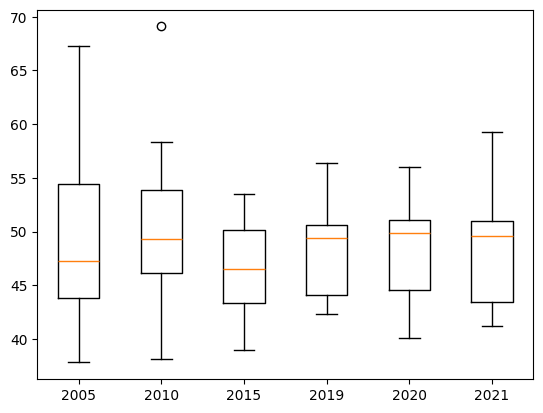

In [158]:
data = [nt_doc.iloc[:, i] for i in range(len(nt_doc.columns))]
data = data[1:]
plt.boxplot(data, tick_labels=nt_doc.columns[1:])
plt.show()
new_data = []
for i in range(len(nt_doc.columns)):
    new_data.append(nt_doc.iloc[:, i].to_list())
new_data = new_data[1:]

№3. Вычислить описательную статистику: среднее, стандартное отклонение, квартили, 
минимальное и максимальное значения показателя X в каждый год периода T по 
указанному в Вашем варианте Федеральному Округу.

In [159]:
def description_statistics(array: np.array) -> None:
    print("Среднее: ", array.mean())
    print("Стандартное отклонение: ", np.std(array))
    print("Дисперсия: ", np.var(array))
    print("Квартили:")
    quantilies = np.quantile(array, [0.25, 0.5, 0.75])
    print("25% - ", quantilies[0])
    print("75% - ", quantilies[2])
    print("Максимум: ", np.max(array))
    print("Минимум: ", np.min(array))
    print("\n\n")

In [160]:
statistics_2005 = nt_doc.iloc[:, 1]
print("2005:\n")
description_statistics(statistics_2005)
statistics_2010 = nt_doc.iloc[:, 2]
print("2010:\n")
description_statistics(statistics_2010)
statistics_2015 = nt_doc.iloc[:, 3]
print("2015:\n")
description_statistics(statistics_2015)
statistics_2019 = nt_doc.iloc[:, 4]
print("2019:\n")
description_statistics(statistics_2019)
statistics_2020 = nt_doc.iloc[:, 5]
print("2020:\n")
description_statistics(statistics_2020)
statistics_2021 = nt_doc.iloc[:, 6]
print("2021:\n")
description_statistics(statistics_2021)

statistics = [statistics_2005, statistics_2010, statistics_2015, statistics_2019, statistics_2020, statistics_2021]

2005:

Среднее:  49.58
Стандартное отклонение:  9.045308176065644
Дисперсия:  81.8176
Квартили:
25% -  43.775
75% -  54.425
Максимум:  67.3
Минимум:  37.8



2010:

Среднее:  50.85
Стандартное отклонение:  8.15833929179217
Дисперсия:  66.55849999999997
Квартили:
25% -  46.125
75% -  53.85
Максимум:  69.1
Минимум:  38.1



2015:

Среднее:  46.720000000000006
Стандартное отклонение:  4.297859932571093
Дисперсия:  18.471600000000002
Квартили:
25% -  43.35
75% -  50.175
Максимум:  53.5
Минимум:  39.0



2019:

Среднее:  48.4
Стандартное отклонение:  4.668618639383602
Дисперсия:  21.796000000000003
Квартили:
25% -  44.05
75% -  50.65
Максимум:  56.4
Минимум:  42.3



2020:

Среднее:  48.4
Стандартное отклонение:  4.662402814000523
Дисперсия:  21.738
Квартили:
25% -  44.550000000000004
75% -  51.050000000000004
Максимум:  56.0
Минимум:  40.1



2021:

Среднее:  48.78
Стандартное отклонение:  5.738083303682511
Дисперсия:  32.925599999999996
Квартили:
25% -  43.45
75% -  50.95
Максимум:  59.3


№4. Проверить, можно ли считать, что распределение случайной величины X в указанном 
Федеральном Округе в каждый год периода Т подчинено нормальному закону 
распределения.  Использовать для проверки тест Шапиро-Уилка (уровень значимости alpha 
указан в Вашем варианте).

In [161]:
def shapiro_checker(array: np.array) -> bool:
    result = stats.shapiro(array)
    print(result[1])
    return result[1] > alpha

In [162]:
normal_years = []
for st in statistics:
    if shapiro_checker(st) == True:
        normal_years.append(st)
    

0.5097142609296637
0.7331378722227774
0.9446399364152556
0.41757078874541004
0.8411532849085985
0.33045066137831836


№5.  Выделить те года t1-tm с нормально распределенными значениями рядов данных Xt1- 
Xtm,  где  Xt1- Xtm имеют одинаковую дисперсию (уровень значимости взять равным alpha). 
Использовать для проверки нулевой гипотезы о равенстве дисперсий тесты Бартлетта и  
Левена.

In [163]:
def bartlett_checker(first_array: str, second_array: str) -> None: 
    bartlett_result = stats.bartlett(nt_doc[first_array], nt_doc[second_array])
    print(f"Бартлетт - {first_array} - {second_array} - статистика: {bartlett_result[0]:.4f}, p-value: {bartlett_result[1]:.4f}")
    if bartlett_result[1] < alpha:
        print(f"Дисперсии сильно различаются\n")
    else: 
        print(f"Дисперсии отличаются незначимо\n")

In [164]:
def levene_checker(first_array: str, second_array: str) -> None: 
    levene_result = stats.levene(nt_doc[first_array], nt_doc[second_array])
    print(f"Левен - {first_array} - {second_array} - статистика: {levene_result[0]:.4f}, p-value: {levene_result[1]:.4f}")
    if levene_result[1] < alpha:
        print(f"Дисперсии сильно различаются\n")
    else: 
        print(f"Дисперсии отличаются незначимо\n")

In [165]:
columns = nt_doc.columns
columns = columns[1:]
print("///////////////////////////////////////////")
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        bartlett_checker(columns[i], columns[j])
        levene_checker(columns[i], columns[j])
        print("///////////////////////////////////////////")


///////////////////////////////////////////
Бартлетт - 2005 - 2010 - статистика: 0.0907, p-value: 0.7633
Дисперсии отличаются незначимо

Левен - 2005 - 2010 - статистика: 0.0838, p-value: 0.7755
Дисперсии отличаются незначимо

///////////////////////////////////////////
Бартлетт - 2005 - 2015 - статистика: 4.3407, p-value: 0.0372
Дисперсии сильно различаются

Левен - 2005 - 2015 - статистика: 2.1332, p-value: 0.1614
Дисперсии отличаются незначимо

///////////////////////////////////////////
Бартлетт - 2005 - 2019 - статистика: 3.4858, p-value: 0.0619
Дисперсии отличаются незначимо

Левен - 2005 - 2019 - статистика: 1.7860, p-value: 0.1981
Дисперсии отличаются незначимо

///////////////////////////////////////////
Бартлетт - 2005 - 2020 - статистика: 3.4989, p-value: 0.0614
Дисперсии отличаются незначимо

Левен - 2005 - 2020 - статистика: 1.7378, p-value: 0.2039
Дисперсии отличаются незначимо

///////////////////////////////////////////
Бартлетт - 2005 - 2021 - статистика: 1.7083, p-val

№6. Проверить, можно ли считать, что среднее значение показателя X  по данному 
Федеральному Округу  в каждый год периода t1-tm  значимо выше (ниже) 
общероссийского значения показателя X (уровень значимости взять равным alpha). 
Общероссийские значения показателя X найти в файле CHISLO_DOCTORS.xlsx. 
Использовать для проверки гипотезы о равенстве средних t-тест для одной выборки.

In [166]:
rus_doc=pd.read_excel(path, sheet_name='ROSSTAT')
rus_doc = rus_doc.iloc[[3]].iloc[:, 7:13]
rus_doc.columns = ['2005', '2010','2015','2019', '2020', '2021']
rus_doc.insert(0, 'Название', ['Российская Федерация'])
rus_doc.set_index("Название", inplace=True)
rus_doc

,2005,2010,2015,2019,2020,2021
Название,,,,,,
Российская Федерация,48.6,50.1,45.9,48.7,50.4,51.0


In [167]:
print("///////////////////////////////////////////")
for column in columns:
    col = nt_doc[column].to_list()
    col_mean = np.mean(col)
    rus_mean = rus_doc[column].loc["Российская Федерация"]
    print(rus_mean)
    print(f"{column}: Фед.округ - {col_mean}, РФ - {rus_mean}")
    if col_mean < rus_mean: 
        t_statistic, p_value = stats.ttest_1samp(col, rus_mean, alternative="less")
        if p_value < alpha:
            print("Среднее значение статистически МЕНЬШЕ среднего по РФ")
        else:
            print("По 'меньше': нет статистически значимого различия")
    else:
        t_statistic, p_value = stats.ttest_1samp(col, rus_mean, alternative="greater")
        if p_value < alpha:
            print("Среднее значение статистически БОЛЬШЕ среднего по РФ")
        else:
            print("По 'больше': нет статистически значимого различия")
    print(p_value)
    print("///////////////////////////////////////////")

///////////////////////////////////////////
48.6
2005: Фед.округ - 49.58, РФ - 48.6
По 'больше': нет статистически значимого различия
0.3762931842876505
///////////////////////////////////////////
50.1
2010: Фед.округ - 50.85, РФ - 50.1
По 'больше': нет статистически значимого различия
0.394468056906326
///////////////////////////////////////////
45.9
2015: Фед.округ - 46.720000000000006, РФ - 45.9
По 'больше': нет статистически значимого различия
0.29054006678035693
///////////////////////////////////////////
48.7
2019: Фед.округ - 48.4, РФ - 48.7
По 'меньше': нет статистически значимого различия
0.42570698601967405
///////////////////////////////////////////
50.4
2020: Фед.округ - 48.4, РФ - 50.4
По 'меньше': нет статистически значимого различия
0.1151221530794506
///////////////////////////////////////////
51.0
2021: Фед.округ - 48.78, РФ - 51.0
По 'меньше': нет статистически значимого различия
0.1378188571461564
///////////////////////////////////////////


№7. Проверить, можно ли считать, что различия между средними значениями  показателя 
X  по данному Федеральному Округу  в какие-то два года из периода t1-tm  незначимы, 
появились случайно (уровень значимости взять равным alpha). Использовать для проверки 
гипотезы о равенстве средних t-тест для двух выборок.

In [168]:
print("///////////////////////////////////////////")
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        first = nt_doc[columns[i]].to_list()
        first_mean = np.mean(first)
        second = nt_doc[columns[j]].to_list()
        second_mean = np.mean(second)
        if first < second:
            t_statistic, p_value = stats.ttest_ind(first, second, alternative='less')
            if p_value < alpha:
                print(f"Среднее значение по {columns[i]} статистически МЕНЬШЕ, чем у  {columns[j]}")
            else:
                print(f"По 'меньше': нет статистически значимого различия между {columns[i]} и {columns[j]}")
        else: 
            t_statistic, p_value = stats.ttest_ind(first, second, alternative='greater')
            if p_value < alpha:
                print(f"Среднее значение по {columns[i]} статистически БОЛЬШЕ, чем у {columns[j]}")
            else:
                print(f"По 'больше': нет статистически значимого различия между {columns[i]} и {columns[j]}")
        print(f"P_value: {p_value}")
        print("///////////////////////////////////////////")

///////////////////////////////////////////
По 'меньше': нет статистически значимого различия между 2005 и 2010
P_value: 0.37902024796201667
///////////////////////////////////////////
По 'меньше': нет статистически значимого различия между 2005 и 2015
P_value: 0.7985804431633037
///////////////////////////////////////////
По 'меньше': нет статистически значимого различия между 2005 и 2019
P_value: 0.6339775209250358
///////////////////////////////////////////
По 'меньше': нет статистически значимого различия между 2005 и 2020
P_value: 0.6340134712441834
///////////////////////////////////////////
По 'меньше': нет статистически значимого различия между 2005 и 2021
P_value: 0.587379661764303
///////////////////////////////////////////
По 'меньше': нет статистически значимого различия между 2010 и 2015
P_value: 0.9021214155320029
///////////////////////////////////////////
По 'меньше': нет статистически значимого различия между 2010 и 2019
P_value: 0.7777924492518486
////////////////////

№8. Проверить значимость отличий средних  в   выбранной группе (уровень значимости 
взять равным alpha). Использовать для проверки гипотезы о равенстве средних групп тест 
Тьюки и односторонний тест ANOVA.

In [169]:
res = stats.f_oneway(*new_data)
print(res)
if res[1] > alpha:
    print(f'Средние незначительно отличаются друг от друга с вероятностью {res[1]}\n')
else:
    print(f'Хотя бы одно среднее по году отличается от большинства\n')

res = stats.tukey_hsd(*new_data)
print(res)


F_onewayResult(statistic=np.float64(0.4197750745661966), pvalue=np.float64(0.8329397664232344))
Средние незначительно отличаются друг от друга с вероятностью 0.8329397664232344



Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -1.270     0.998   -10.139     7.599
 (0 - 2)      2.860     0.931    -6.009    11.729
 (0 - 3)      1.180     0.999    -7.689    10.049
 (0 - 4)      1.180     0.999    -7.689    10.049
 (0 - 5)      0.800     1.000    -8.069     9.669
 (1 - 0)      1.270     0.998    -7.599    10.139
 (1 - 2)      4.130     0.741    -4.739    12.999
 (1 - 3)      2.450     0.963    -6.419    11.319
 (1 - 4)      2.450     0.963    -6.419    11.319
 (1 - 5)      2.070     0.982    -6.799    10.939
 (2 - 0)     -2.860     0.931   -11.729     6.009
 (2 - 1)     -4.130     0.741   -12.999     4.739
 (2 - 3)     -1.680     0.993   -10.549     7.189
 (2 - 4)     -1.680     0.993   -10.549     7.189
 (2 - 5)     -2.060     0.983   -10.929     6.809
 (3 - 0)     -1.180     0.999   -10.049     7.689
 (3 - 1)     -2.450     0.963   -11.319     6.419
 (3 - 2)      1.680     0.993   